In [6]:
import pandas as pd
import numpy as np
from sklearn import linear_model

In [42]:
df = pd.read_csv("homeprices_video5.csv",sep=";")
df.head()

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


In [44]:
model= linear_model.LinearRegression()
model.fit(df[["area"]],df.price)

LinearRegression()

In [45]:
model.coef_

array([135.78767123])

In [46]:
model.intercept_

180616.43835616432

In [53]:
model.predict([[5000]]) # [[]] parantez önemli

array([859554.79452055])

In [56]:
import pickle # bir python nesnesini seri haline getirmeye yarar

* Programcıları karmaşık veri türlerini saklamak için kodlamak ve hata ayıklamak ile uğraştırmak yerine Python bu iş için pickle adlı standart modülü sağlar. Bu hayret verici modül neredeyse herhangi bir Python nesnesini (bazı Python kodu biçimlerini bile!) dizge ile ifade edilebilecek hale getirebilir ve bu halinden geri alabilir. Bu dönüşüm ve geri kazanım işlemleri arasında nesne bir dosyaya kaydedilebilir ya da ağ bağlantısı ile uzaktaki başka bir makineye gönderilebilir.



* x gibi bir nesneniz ve yazma işlemi için açılmış f gibi bir dosya nesneniz varsa bu nesneyi dosyaya aktarmanız için tek satırlık kod yeterli olur:
   pickle.dump(x, f)



* Nesneyi geri almak için ise f okumak için açılmış bir dosya nesnesi olsun:
    x = pickle.load(f)

In [61]:
with open('model_pickle','wb') as f:  #wb write mode b: binary den geliyor?
    pickle.dump(model, f)

* model bir dosyaya kaydedilir.
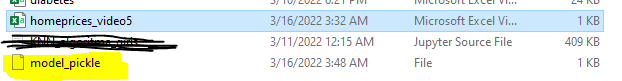 

In [63]:
with open('model_pickle','rb') as f: 
    mp=pickle.load(f)

* Tahmin için mp nesnesi kullanılırsa

In [64]:
mp.predict([[5000]])

array([859554.79452055])

* Aynı tahmin sonucu verdiği görülüyor. 

* model_pickle dosyası eğitilmiş model olarak gönderilebilir.
    Bu modele sorular sorulabilir. Buna cevap verecek eğitimli modeldir.

##### modeli kaydetmenin ikinci bir yaklaşımı var; 
    sklearn model persistence -> joblib
* Bu modül sklearn paketinin altında bulunuyor. Doğrudan Scikit-Learn modellerini serileştirmek için tasarlanmış. Diğer nesne serileştirme modüllerine nazaran, büyük Numpy dizilerini daha verimli bir şekilde taşıyor. 


* Ama dikkat etmeniz gereken bir unsur var: 
    Bu modül ile modelinizi serileştirip dosyaya kaydettiğinizde, modelin içindeki tüm Numpy dizileri farklı birer dosyaya kaydediliyor. Bu nedenle, modelin içe aktarılabilmesi için tüm dosyaların  aynı klasörde bulunması şart.

#### Not: pickle ve joblib aynı işi yapıyor. 
    ikisinin farkı nedir?
    
* veriler büyük numpy dizilerinden oluşuyorsa o zaman joblib daha avantajlı 

In [68]:
import joblib as jb

In [69]:
jb.dump(model,"model_joblib")

['model_joblib']

Bu da dosya olarak kaydedilir.

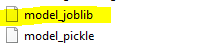 

In [71]:
#model joblib.load() kullanarak yüklenir.
mj= jb.load('model_joblib')

In [72]:
mj.predict([[5000]])

array([859554.79452055])

* Bu da eğitilmiş olarak aynı sonucu vermiş olur. 


* coef_ değerleri de aynı olur.


* Yani tüm bu önemli parçalar model için kaydediliyor.

In [73]:
mj.coef_

array([135.78767123])

Bu Model kaydetme yöntemleriyle sadece bu örnekteki gibi lineer regresyon değil diğer yöntemler de kaydedilebilir. 